In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from num2words import num2words

from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("/home/eetil1818/code/nghia95/fake-data-detector/raw_data/1k_sampled_dataset.csv")
data.head()

,text,source,prompt_id,text_length,word_count
0,The Philosophy and Ethics of Transhumanism\n\n...,GPT-3.5,1920,2558,394
1,Crime-tracking app Citizen is launching its ow...,Flan-T5-XXL,0,378,62
2,The court in Novorossiysk gave two of the danc...,GLM-130B,0,621,109
3,"then drops the drumsticks, poses, then walks o...",GPT-J,0,513,90
4,On tally went to the beach. She found a sand d...,GPT-J,0,4984,846


In [3]:
df = data.copy()
df["source"] = df["source"].apply(lambda x: "AI" if x != "Human" else x)
df.drop(columns="prompt_id", inplace=True)
df.head()

,text,source,text_length,word_count
0,The Philosophy and Ethics of Transhumanism\n\n...,AI,2558,394
1,Crime-tracking app Citizen is launching its ow...,AI,378,62
2,The court in Novorossiysk gave two of the danc...,AI,621,109
3,"then drops the drumsticks, poses, then walks o...",AI,513,90
4,On tally went to the beach. She found a sand d...,AI,4984,846


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import string
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


In [5]:
df["source"].value_counts(normalize=True)

source
Human    0.559
AI       0.441
Name: proportion, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         1000 non-null   object
 1   source       1000 non-null   object
 2   text_length  1000 non-null   int64 
 3   word_count   1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


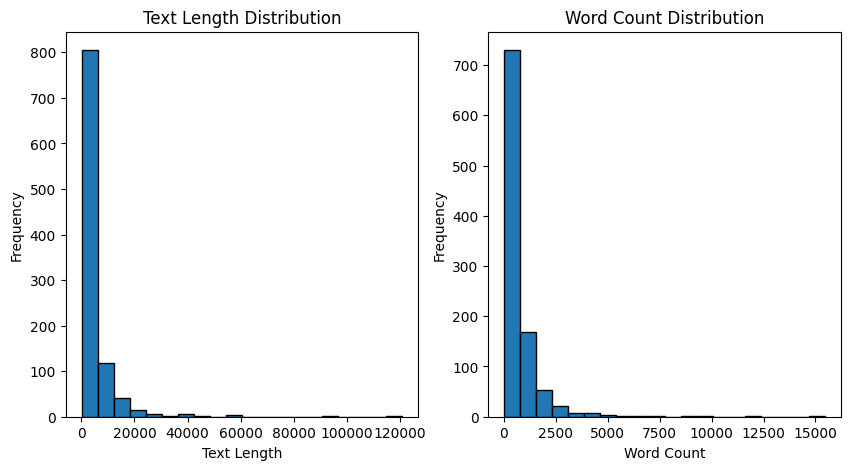

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(df["text_length"], bins=20, edgecolor="black")
axes[0].set_title("Text Length Distribution")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["word_count"], bins=20, edgecolor="black")
axes[1].set_title("Word Count Distribution")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")

plt.show()


In [8]:
# Check if text column contains numbers and special characters

df["contains_numbers"] = df["text"].str.contains(r"\d", regex=True)
df["contains_special_chars"] = df["text"].str.contains(r"[^\w\s]", regex=True)

df.head()

,text,source,text_length,word_count,contains_numbers,contains_special_chars
0,The Philosophy and Ethics of Transhumanism\n\n...,AI,2558,394,False,True
1,Crime-tracking app Citizen is launching its ow...,AI,378,62,True,True
2,The court in Novorossiysk gave two of the danc...,AI,621,109,True,True
3,"then drops the drumsticks, poses, then walks o...",AI,513,90,True,True
4,On tally went to the beach. She found a sand d...,AI,4984,846,False,True


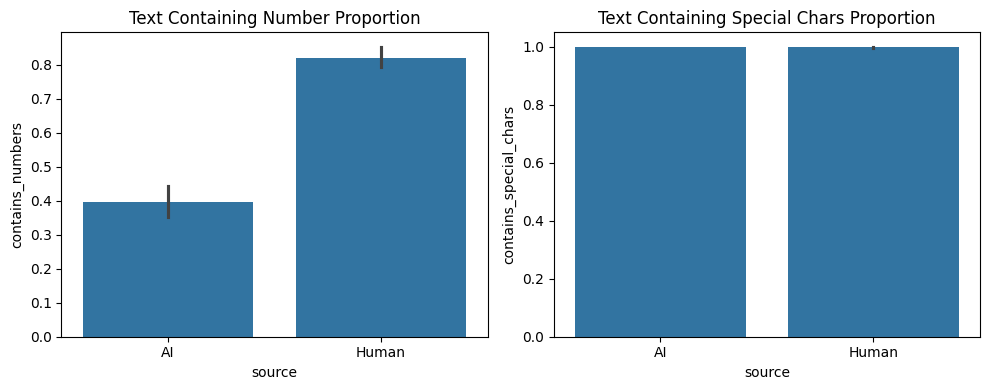

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=df["source"], y=df["contains_numbers"], ax=axes[0])
axes[0].set_title("Text Containing Number Proportion")

sns.barplot(x=df["source"], y=df["contains_special_chars"], ax=axes[1])
axes[1].set_title("Text Containing Special Chars Proportion")

plt.tight_layout();

In [9]:
df["contains_numbers"].value_counts()

contains_numbers
True     634
False    366
Name: count, dtype: int64

In [10]:
df["contains_special_chars"].value_counts()

contains_special_chars
True     999
False      1
Name: count, dtype: int64

In [11]:
# checking one of the text that contains special chars

df[df["contains_special_chars"] == True]["text"].iloc[4]

'On tally went to the beach. She found a sand dollar along the shore. She didn\'t know what to do with it. She asked people along the beach if they knew how she could get rid of her pain, but everyone had an idea except for one man who stood onshore and said that he knew nothing about such things. She was worried because every day her mother remained in bed longer than usual. The days were hot now so long as her mother remained indoors. Her friend\'s father took her home just before noon when his shift ended at two o\'clock. At nightfall while waiting for him to return from work, Anna fell asleep across doorsills where cooks walked up and down bringing food or going out looking for something else to eat. Her mother moaned all through their walk back to Mijas until they reached the house. This time nobody came and no-one opened the door. Silence reigned inside too. "I\'m getting cold," her mother kept repeating. "You\'ll have to keep me warm." In vain did she try to lift herself off the

## Data Cleaning & Preproc

In [73]:
symbols_to_keep = {"$", "-", "%"}

def preprocessing(text):
    """Clean text but preserve some symbols and numbers."""
    text = text.lower() # Turn to all lowercase
    text = text.strip() # Remove whitespace
    text = " ".join(text.split()) # Remove multiple spaces

    text_clean = []

    for char in text:
        if char not in string.punctuation or char in symbols_to_keep:
            text_clean.append(char)  # Keep numbers and allowed symbols
        else:
            text_clean.append("")  # Replace other punctuation with space/nothing

    text_clean = "".join(text_clean)

    tokenized = word_tokenize(text_clean)
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_text = " ".join(lemmatized)

    return cleaned_text


In [74]:
df_clean = df.drop(columns=["contains_numbers", "contains_special_chars"])
df_clean.head()

,text,source,text_length,word_count
0,The Philosophy and Ethics of Transhumanism\n\n...,AI,2558,394
1,Crime-tracking app Citizen is launching its ow...,AI,378,62
2,The court in Novorossiysk gave two of the danc...,AI,621,109
3,"then drops the drumsticks, poses, then walks o...",AI,513,90
4,On tally went to the beach. She found a sand d...,AI,4984,846


In [75]:
df_clean["clean_text"] = df_clean["text"].apply(preprocessing)
df_clean.head()

,text,source,text_length,word_count,clean_text
0,The Philosophy and Ethics of Transhumanism\n\n...,AI,2558,394,the philosophy and ethic of transhumanism tran...
1,Crime-tracking app Citizen is launching its ow...,AI,378,62,crime-tracking app citizen is launching it own...
2,The court in Novorossiysk gave two of the danc...,AI,621,109,the court in novorossiysk gave two of the danc...
3,"then drops the drumsticks, poses, then walks o...",AI,513,90,then drop the drumstick pose then walk off of ...
4,On tally went to the beach. She found a sand d...,AI,4984,846,on tally went to the beach she found a sand do...


In [77]:
# Add new columns to calculate char and words in the cleaned_text
df_clean["clean_text_len"] = df_clean["clean_text"].str.len()
df_clean["clean_word_count"] = df_clean["clean_text"].str.split().apply(len)

# encode "source" column (AI & Human)
encoder = LabelEncoder()
df_clean["label"] = encoder.fit_transform(df_clean["source"])

In [78]:
df_clean.head()

,text,source,text_length,word_count,clean_text,clean_text_len,clean_word_count,label
0,The Philosophy and Ethics of Transhumanism\n\n...,AI,2558,394,the philosophy and ethic of transhumanism tran...,2462,394,0
1,Crime-tracking app Citizen is launching its ow...,AI,378,62,crime-tracking app citizen is launching it own...,363,62,0
2,The court in Novorossiysk gave two of the danc...,AI,621,109,the court in novorossiysk gave two of the danc...,594,109,0
3,"then drops the drumsticks, poses, then walks o...",AI,513,90,then drop the drumstick pose then walk off of ...,493,90,0
4,On tally went to the beach. She found a sand d...,AI,4984,846,on tally went to the beach she found a sand do...,4792,846,0
